<center>
<img src="https://tensorflowkorea.files.wordpress.com/2020/12/4.-e18492e185a9e186abe1848ce185a1-e18480e185a9e186bce18487e185aee18492e185a1e18482e185b3e186ab-e18486e185a5e18489e185b5e186abe18485e185a5e18482e185b5e186bce18483e185b5e186b8e18485e185a5e.png?w=972" width="250" height="250"><br>
</center>


 - (https://bit.ly/hg-6-1)
 - (https://bit.ly/hg-6-2)
 - (https://bit.ly/hg-6-3)
 
 
 
 # Chapter06. 비지도 학습 ( 비슷한 과일끼리 모으자!)
 
 - 학습목표
     - 타깃이 없는 데이터를 사용하는 비지도 학습과 대표적인 알고리즘을 소개한다.
     - 대표적인 군집 알고리즘인 k-평균과 DBSCAN을 배운다.
     - 대표적인 차원 축소 알고리즘인 주성분 분석(PCA)을 배운다.
     
## 06-1 군집 알고리즘

- 핵심키워드
    - 비지도 학습
    - 히스토그램
    - 군집
    - 흑백 사진을 분류하기 위해 여러가지 아이디어를 내면서 비디도 학습과 군집 알고리즘에 대해 이해한다.
    
#### 문제 상황

고객이 과일 사진을 보내면 그중 가장 많이 요청하는 과일을 판매 품목으로 선정하려 한다. 또 1위로 선정된 과일 사진을 보낸 고객 중 몇 명을 뽑아 이벤트 당첨자로 선정할 것이다. 그런데 고객이 올린 사진을 사람이 하나씩 분류하기는 어렵다. 그렇다고 생선처럼 미리 과일 분류기를 훈련하기에는 고객들이 어떤 과일 사진을 보낼지 알 수 없으니 곤란하다. 사진에 대한 정답(타깃)을 알지 못하는데 어떻게 이 사진을 종류대로 모을 수 있을까?

### 타깃을 모르는 비지도 학습

타깃을 모르는 사진을 종류별로 분류하려 한다. 이렇게 타깃이 없을 때 사용하는 머신러닝 알고리즘이 있다. 바로 **비지도 학습 unsupervised learning** 이다. 사람이 가르쳐 주지않아도 데이터에 있는 무언가를 학습하는 것이다. 

"사진의 픽셀값을 모두 평균 내면 비슷한 과일끼리 모이지 않을까?"

"글쎄요. 확신할 수는 없지만 해 봐야 알 것 같다."

"모델을 만들기 위해 개발 팀에서 사진 300장을 받아 놨네. 같이 고민해 보자고."

그럼 데이터를 준비하고 픽셀값을 이용해서 사진을 분류해보겠다.

### 과일 사진 데이터 준비하기

데이터는 사과, 바나나, 파인애플을 담고 있는 흑백 사진이다. 이 데이터는 넘파이 배열의 기본 저장 포맷인 npy 파일로 저장되어있다. 넘파이에서 이 파일을 읽으려면 먼저 코랩으로 다운로드해야한다. 코랩에서 다음 명령을 실행해 파일을 다운로드 하자.

- 이 과일 데이터는 캐글에 공개된 데이터셋 이다. https://www.kaggle.com/moltean/fruits



In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2021-05-29 08:23:14--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-05-29 08:23:14--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 15.164.81.167
Connecting to github.com (github.com)|15.164.81.167|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-05-29 08:23:15--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... con

그럼 이 파일에서 데이터를 로드하겠다. 먼저 넘파이와 맷플롯립 패키지를 임포트 하자.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

넘파이에서 npy 파일을 로드하는 방법은 아주 간단하다. load() 메서드에 파일 이름을 전달하는 것이 전부다

In [3]:
fruits = np.load('fruits_300.npy')

fruits는 넘파이 배열이고 fruits_300.npy 파일에 들어 있는 모든 데이터를 담고 있다. fruits 배열의 크기를 확인 하겠다.

In [4]:
print(fruits.shape)

(300, 100, 100)


이 배열의 첫 번째 차원(300)은 샘플의 개수를 나타내고, 두 번째 차원(100)은 이미지 높이, 세 번째 차원(100)은 이미지 너비이다. 이미지 크기는 100 x 100 이다. 각 픽셀은 넘파이 배열의 원소 하나에 대응한다. 즉 배열의 크기가 100 x 100 이다.

첫 번째 이미지의 첫 번째 행을 출력하겠다. 3차원 배열이기 때문에 처음 2개의 인덱스를 0으로 지정하고 마지막 인덱스는 지정하지 않거나 슬라이싱 연산자를 씀면 첫 번째 이미지의 첫 번째 행을 모두 선택 할 수 있다.

In [5]:
print(fruits[0,0,:])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


첫 번째 행에 있는 픽셀 100개에 들어 있는 값을 출력했다. 이 넘파이 배열은 흑백 사진을 담고 있으므로 0~255까지의 정숫값을 가진다. 이 정숫값에 대해 조금 더 설명하기 전에 먼저 첫 번째 이미지를 그림으로 그려서 이 숫자와 비교해 보자.

맷플롯립의 imshow() 함수를 사용하면 넘파이 배열로 저장된 이미지를 쉽게 그릴 수 있다. 흑백 이미지이므로 cmap 매개변수를 'gray'로 지정한다.

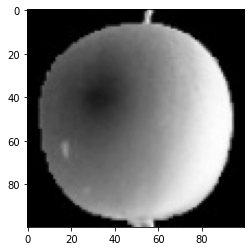

In [6]:
plt.imshow(fruits[0], cmap='gray')
plt.show()

첫 번째 이미지는 사과 같다. 다음의 그림 처럼 첫 번째 행이 위에서 출력한 배열 값에 해당한다. 0에 가까울 수록 검게 나타나고 높은 값은 밝게 표시된다.

보통 흑백 샘플 이미지는 바탕이 밝고 물체(여기서는 사과)가 짙은 색이다. 그런데 왜 이렇게 보일까? 사실 이 흑백 이미지는 사진으로 찍은 이미지를 넘파이 배열로 변환할 때 반전시킨 것이다. 사진의 흰 바탕(높은 값)은 검은색(낮은 값)으로 만들고 실제 사과가 있어 짙은 부분(낮은 값)은 밝은색(높은 값)으로 바꾸었다.  왜 이렇게 바꾸었을까? 우리의 관심 대상은 바탕이 아니라 사과이다. 흰색 바탕은 우리에게 중요하지만 않지만 컴퓨터는 255개 가까운 바탕에 집중할 것이다. 따라서 바탕을 검게 만들고 사진에 짙게 나온 사과를 밝은색으로 만들었다.

- 컴퓨터는 왜 255에 가까운 바탕으로 집중하나요?
    - 알고리즘이 어떤 출력을 만들기 위해 곱셈,덧셈을 한다. 픽셀값이 0이면 출력도 0이 되어 의미가 없다. 픽셀값이 높으면 출력값도 커지기 때문에 의미를 부여하기 좋다.
    
우리가 보는 것과 컴퓨터가 처리하는 방식이 다르기 때문에 종종 흑백 이미지를 이렇게 반전하여 사용한다. 관심 대상의 영역을 높은 값으로 바꾸었지만 맷플롯립으로 출력할 때 바탕이 검게 나오므로 보기에는 썩 좋지 않다. cmap 매개변수를 'gray_r'로 지정하면 다시 반전하여 우리 눈에 보기 좋게 출력한다. 

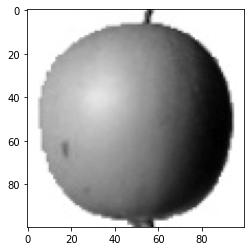

In [7]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

- 이 그림에서 밝은 부분이 0에 가깝고 짙은 부분이 255에 가까운 값이라는 것을 꼭 기억하자.

이 데이터는 사과,바나나, 파인애플이 각각 100개씩 들어 있다. 바나나와 파인애플 이미지도 출력해보자.

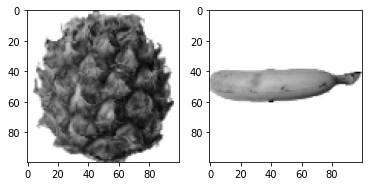

In [10]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

그림이 보기 좋게 나란히 나왔다. 맷플롯립의 subplots() 함수를 사용하면 여러 개의 그래프를 배열처럼 쌓을 수 있도록 도와준다. subplots() 함수의 두 매개변수는 그래프를 쌓을 행과 열을 지정한다. 여기에서는 subplots(1,2) 처럼 하나의 행과 2개의 열을 지정한다.

반환된 axs는 2개의 서브 그래프를 담고 있는 배열이다. axs[0]에 파인애플 이미지를, 그리고 axs[1]에 바나나 이미지를 그렸다. 이 장에 subplots()를 사용해 한 번에 여러 개의 이미지를 그려 보겠다.

자 이제 샘플 데이터가 준비되었다. 이 데이터의 처음 100개는 사과, 그다음 100개는 파인애플, 마지막 100개는 바나나이다. 각 과일 사진은 평균을 내서 차이를 확인해 보자.


### 픽셀값 분석하기

사용하기 쉽게 fruits 데이터를 사과, 파인애플, 바나나로 각각 나누어 보자. 넘파이 배열을 나눌때 100 x 100 이미지를 펼쳐서 길이가 10,000인 1차원 배열로 만든다. 이렇게 펼치면 이미지로 출력하긴 어렵지만 배열을 계산할 때 편리하다.

fruits 배열에서 순서대로 100개씩 선택하기 위해 슬라이싱 연산자를 사용한다. 그다음 reshape() 메서드를 사용해 두 번째 차원(100)과 세 번째 차원(100)을 10,000으로 합친다. 첫 번째 차원을 -1로 지정하면 자동으로 남은 차원을 할당한다. 여기에서는 첫 번째 차원이 샘플 개수이다.

In [11]:
apple = fruits[0:100].reshape(-1, 100 * 100)
pineapple = fruits[100:200].reshape(-1, 100 * 100)
banana = fruits[200:300].reshape(-1, 100 * 100)

이제 apple, pineapple, banana 배열의 크기는 (100, 10000)이다. 사과를 확인해 보자.

In [12]:
print(apple.shape)

(100, 10000)


좋다. 이제 apple, pineapple, banana 배열에 들어 있는 샘플의 픽셀 평균값을 계산해 보자. 이제 넘파이 mean() 메서드를 사용할 것이다. 샘플마나 픽셀의 평균값을 계산해야 하므로 mean() 메서드가 평균을 계산할 축을 지정해야 한다. axis=0으로 하면 첫 번째 축인 행을 따라 계산한다.axis=1로 지정하면 두 번째 축인 열을 따라 계산한다.

- axis 인수가 뭔가요?
    - 2장에서도 잠깐 나오긴 했는데 정확인 axis에 대해 언급하지는 않았다. axis는 배열의 '축'을 의미한다. 다음의 apple 2차원 배열에서 axis=1 일 때는 열방향으로 계싼하고, axis=0일 때는 행 방향으로 계산한다.
    
우리가 필요한 것은 샘플의 평균값이다. 샘플은 모두 가로로 값을 나열했으니 axis=1로 지정하여 평균을 계산하자.(앞서 2차원 배열을 1차원 배열로 치환했기에 가능한 계산이다.) 평균을 계산하는 넘파이 np.mean() 함수를 사용해도 되지만 넘파이 배열은 이런 함수들을 메서드로도 제공한다. apple 배열의 mean() 메서드로 각 샘플의 픽셀 평균값을 계산해 보자.

In [13]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


사과 샘플 100개에 대한 픽셀 평균값을 계산했다. 히스토그램 histogram을 그려보면 평균값이 어떻게 분포되어 있는지 한눈에 잘 볼 수 있다.

- 히스토그램이 뭔가요?
    - 히스토그램은 값이 발생한 빈도를 그래프로 표시한 것이다. 보통 x축이 값의 구간(계급)이고, y축은 발생 빈도(도수)이다. 엑셀이나 스프레드시트 등에서 그려본 막대그래프를 상상해보자.
    
    
맷플롯립의 hist() 함수를 사용해 히스토그램을 그려보자. 사과, 파인애플, 바나나에 대한 히스토그램을 모두 겹쳐 그려 보자. 이렇게 하면 조금 투명하게 해야 겹친 부분을 잘 볼 수 있다. alpha 매개변수를 1보다 작게 하면 투명도를 줄 수 있다. 또 맷플롯립의 legend() 함수를 사용해 어떤 과일의 히스토그램인지 범례를 만들어보자.

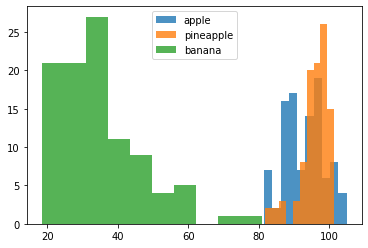

In [16]:
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple','pineapple','banana'])
plt.show()

히스토그램을 보면 바나나 사진의 평균값은 40아래에 집중되어 있다. 사과와 파인애플은 90~100 사이에 많이 모여 있다. 이 그림을 보면 바나나는 픽셀 평균값만으로 사과나 파인애플과 확실히 구분된다. 바나나는 사진에서 차지하는 영역이 작기 때문에 평균값이 작다.

반면 사과와 파인애플은 많이 겹쳐있어서 픽셀값만으로는 구분하기 쉽지 않다. 사과나 파인애플은 대체로 형태가 동그랗고 사진에서 차지하는 크기도 비슷하기 때문이다.

좀 더 나은 방법은 없을까? 샘플의 평균값이 아니라 픽셀별 평균값을 비교해 보면 어떨까 생각해보자. 전체 샘플에 대해 각 픽셀의 평균을 계산하는 거다. 세 과일은 모양이 다르므로 픽셀값이 높은 위치가 조금 다를 것 같다.

픽셀의 평균을 계산하는 것도 간단하다. axis=0 으로 지정하면 된다. 이번에는 맷플롯립의 bar()함수를 사용해 픽셀 10,000개에 대한 평균값을 막대그래프로 그려 본다. subplots()함수로 3개의 서브 그래프를 만들어 사과, 파인애플, 바나나에 대한 막대그래프를 그려본다.


In [17]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

순서대로 사과, 파인애플, 바나나 그래프이다. 3개의 그래프를 보면 과일마다 값이 높은 구간이 다르다. 사과는 사진 아래쪼그로 갈수록 값이 높아지고, 파인애플 그래프는 비교적 고르면서 높다. 바나나는 확실히 중앙의 픽셀값이 높다.

픽셀 평균값을 100 x 100 크기로 바꿔서 이미지처럼 출력하여 위 그래프와 비교하면 더 좋다. 픽셀을 평균 낸 이미지를 모든 사진을 합쳐 놓은 대표 이미지로 생각할 수 있다.

In [18]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)
fig, axs = plt.subplots(1,3,figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

세 과일은 픽셀 위치에 따라 값의 크기가 차이 난다. 따라서 이 대표 이미지와 가까운 사진을 골라 낸다면 사과,파인애플, 바나나를 구분할수 있지 않을까?

### 평균값과 가까운 사진 고르기

사과 사진의 평균값이 apple_mean과 가장 가까운 사진을 골라보자. 3장에서 봤던 절댓값 오차를 사용하겠다. fruits 배열에 있는 모든 샘플에서 apple_mean을 뺀 절댓값의 평균을 계산하면 된다.

절댓값부터 계산해야한다. 넘파이 abs()함수는 절댓값을 계산하는 함수이다. 예를 들어 np.abs(-1)은 1을 반환한다. 배열을 입력하면 모든 원소의 절댓값을 계산하여 입력과 동일한 크기의 배열을 반환한다. 이 함수는 np.absolute()함수의 다른 이름이다.

다음 코드에서 abs_diff는 (300,100,100)크기의 배열이다. 따라서 각 샘플에 대한 평균값을 구하기 위해 axis에 두 번째, 세 번째 차원을 모두 지정했다. 이렇게 계산한 abs_mean은 각 샘플의 오차 평균이므로 크기가 (300,)인 1차원 배열이다.

In [19]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


그 다음, 이 값이 가장 작은 순서대로 100개를 골라 보자. 즉 apple_mean과 오차가 가장 작은 샘플 100개를 고르는 셈이다. np.argsort() 함수는 작은 것에서 큰 순서대로 나열한 abs_mean 배열의 인덱스를 반환한다. 이 인덱스 중에서 처음 100개를 선택해 10 x 10 격자로 이루어진 그래프를 그리겠다.

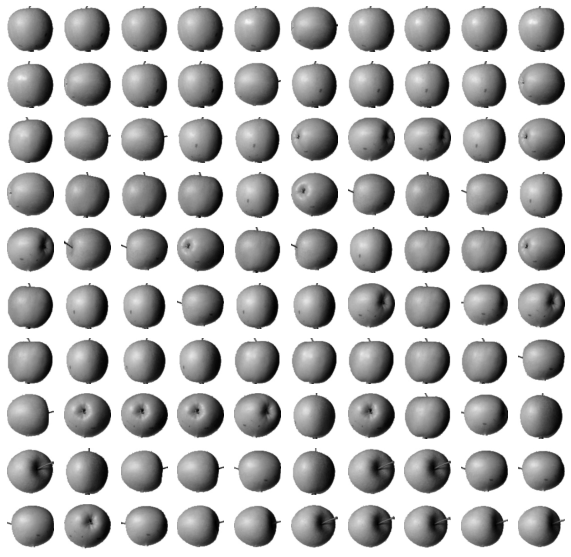

In [23]:
apple_index = np.argsort(abs_mean)[:100]
fig, axs= plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i,j].axis('off')
        
plt.show()

와우! apple_mean과 가장 가까운 사진 100개를 골랐더니 모두 사과이다. 완벽하다! 코드를 조금 더 자세히 설명하겠다.

먼저 subplots() 함수로 10 x 10, 총 100개의 서브 그래프를 만든다. 그래프가 많기 때문에 전체 그래프의 크기를 figsize=(10,10)으로 조금 크게 지정했다.

그다음 2중 for 반복문을 순회하면서 10개의 행과 열에 이미지를 출력한다. axs는 (10,10) 크기의 2차원 배열이므로 i,j 두 점차를 사용하여 서브 그래프 위치를 지정한다. 또 깔끔하게 이미지만 그리기 위해 axis('off')를 사용하여 좌표축을 그리지 않았다.  궁금하다면 'on'으로 값을 바꾸거나 해당 줄을 삭제하고 다시 그림을 그려보자.

- 맷플롯립의 figsize 기본값은 (8,6) 이다.

흑백 사진에 있는 픽셀값을 사용해 과일 사진을 모으는 작업을 해 보았다. 이렇게 비슷한 샘플끼리 그룹으로 모으는 작업을 **군집clustering** 이라고 한다. 군집은 대표적인 비지도 학습 작업 중 하나이다. 군집 알고리즘에서 만든 그룹을 **클러스터cluster**라고 부른다.

하지만 우리는 이미 사과, 파인애플, 바나나가 있다는 것을 알고 있다. 즉 타깃값을 알고 있었기 때문에 사과,파인애플, 바나나의 사진 평균값을 계산해서 가장 가까운 과일을 찾을 수 있다. 실제 비지도 학습에서는 타깃값을 모르기 때문에 이처럼 샘플의 평균값을 미리 구할 수 없다.

타깃값을 모르면서 어떻게 세 과일의 평균값을 찾을 수 있을까? 다음 2절에서 배울 k-평균 알고리즘이 이 문제를 해결해 준다.

### 비슷한 샘플끼리 모으기 - 문제해결 과정


새로운 이벤트를 위해 고객들이 올린 과일 사진을 자동으로 모아야 한다. 어떤 과일 사진을 올릴지 미리 예상할 수 없기 때문에 타깃값을 준비하여 분류 모델을 훈련하기 어렵다.

타깃값이 없을 때 데이터에서 있는 패턴을 찾거나 데이터 구조를 파악하는 머신러닝 방식을 비지도 학습이라고한다. 타깃이 없기때문에 알고리즘을 직접적으로 가르칠 수가 없다. 대신 알고리즘은 스스로 데이터가 어떻게 구성되어 있는지 분석한다.

대표적인 비지도 학습 문제는 '군집'이다. 군집은 비슷한 샘플끼리 그룹으로 모으는 작업이다. 이 절에서는 사진의 픽셀을 사용해 군집과 비슷한 작업을 수행해 보았다. 하지만 샘플이 어떤 과일 인지 미리 알고 있었기 때문에 사과 사진의 평균값을 알 수 있었다.

실제 비지도 학습에서는 타깃이 없는 사진을 사용해야 한ㄷ. 다음 절에서 이런 경우 어떻게 샘플 그룹의 평균값을 찾는지 알아 보겠다.

> 전체 소스 코드

- https://bit.ly/hg-06-1 에 접속하면 코랩에서 이 절의 코드를 바로 열어 볼 수 있다.


군집 알고리즘

과일 사진 데이터 준비하기

In [24]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2021-05-29 09:23:44--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-05-29 09:23:45--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 52.78.231.108
Connecting to github.com (github.com)|52.78.231.108|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-05-29 09:23:46--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... con

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
fruits = np.load('fruits_300.npy')

In [27]:
print(fruits.shape)

(300, 100, 100)


In [28]:
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


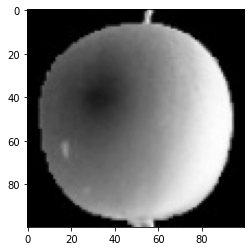

In [29]:
plt.imshow(fruits[0], cmap='gray')
plt.show()

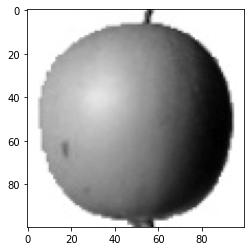

In [30]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

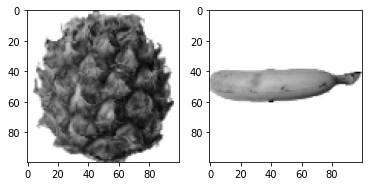

In [31]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

픽셀 값 분석하기

In [32]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [33]:
print(apple.shape)

(100, 10000)


In [34]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


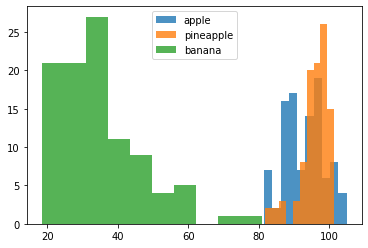

In [35]:
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

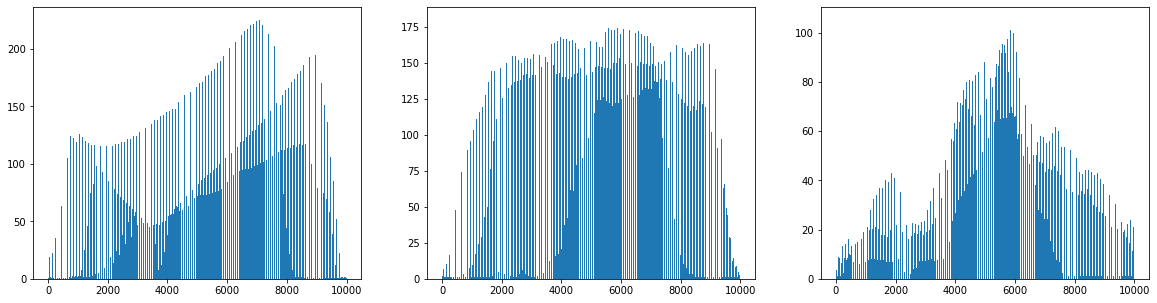

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

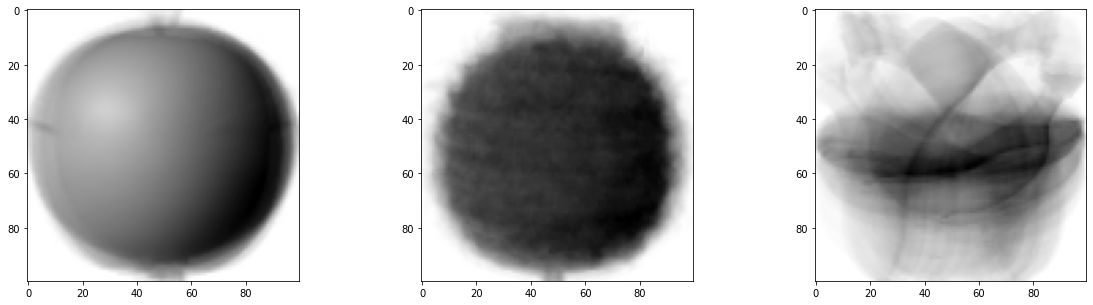

In [37]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

평균값과 가까운 사진 고르기

In [38]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


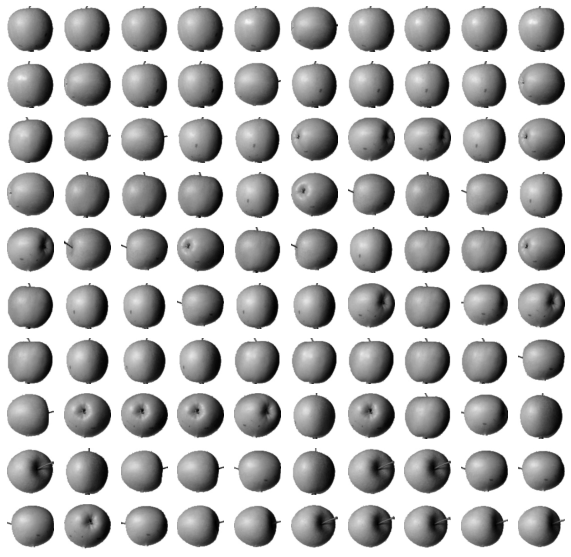

In [39]:
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

## 06-2 k-평균

- 핵심키워드
    - k-평균
    - 클러스터 중심
    - 엘보우 방법
    - k-평균 알고리즘의 작동 방식을 이해하고 과일 사진을 자동으로 모으는 비지도 학습 모델을 만들어 보자.
    
    **k-평균 kmean** 군집 알고리즘이 평균값을 자동으로 찾아 준다. 이 평균값이 클러스터의 중심에 위치하기 때문에 **클러스터 중심 cluster center** 또는 **센트로이드 centroid** 라고 부른다.
    
### k-평균 알고리즘 소개

k-평균 알고리즘의 작동 방식은 다음과 같다.

1. 무작위로 k개의 클러스터 중심을 정한다.
2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정한다.
3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경한다.
4. 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복한다.

### KMeans 클래스

1절에서 사용했던 데잍터셋을 여기에서도 사용한다. 먼저 wget 명령으로 데이터를 다운로드 한다.


In [40]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2021-05-29 09:39:26--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-05-29 09:39:27--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 52.78.231.108
Connecting to github.com (github.com)|52.78.231.108|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-05-29 09:39:27--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... con

그 다음 넘파이 np.load() 함수를 사용해 npy 파일을 읽어 넘파이 배열을 준비한다. k-평균 모델을 훈련하기 위해 (샘플 개수,너비,높이) 크기의 3차원 배열을 (샘플 개수, 너비 x 높이) 크기를 가진 2차원 배열로 변경한다.

In [54]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

사이킷런의 k-평균 알고리즘은 sklearn.cluster 모듈 아래 KMeans 클래스에 구현되어 있다. 이 클래스에서 설정한 매개변수는 클러스터 개수를 지정하는 n_clusters이다. 여기에서는 클러스터 개수를 3으로 지정했다.

이 클래스를 사용하는 방법도 다른 클래스들과 비슷하다. 다만 비지도 학습이므로 fit() 메서드에서 타깃 데이터를 사용하지 않는다.

In [55]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

군집된 결과는 KMeans 클래스 객체의 labels_ 속성에 저장된다. labels_ 배열의 길이는 샘플 개수와 같다. 이 배열은 각 샘플이 어떤 레이블에 해당되는지 나타낸다. n_clusters=3 으로 지정했기 때문에 label_ 배열의 값은 0,1,2 중 하나이다.

In [58]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


레이블값 0,1,2 와 레이블 순서에는 어떤 의미도 없다. 실제 레이블 0,1,2가 어떤 과일 사진을 주로 모았는지 알아보려면 직접 이미지를 출력하는 것이 최선이다. 그 전에 레이블 0,1,2로 모은 샘플의 개수를 확인했다.

In [59]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


첫 번째 클러스터(레이블0)가 91개의 샘플을 모았고, 두 번째 클러스터(레이블1)가 98개의 샘플을 모았다. 세 번째 클러스터(레이블 2)는 111개의 샘플을 모았다. 그럼 각 클러스터가 어떤 이미지를 나타냈는지 그림으로 출력하기 위해 간단한 유틸리티 함수 draw_fruits()를 만들어 보겠다.



In [60]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

draw_fruits()함수는 (샘플 개수,너비, 높이)의 3차원 배열을 입력받아 가로로 10개씩 이미지를 출력한다. 샘플 개수에 따라 행과 열의 개수를 계산하고 figsize를 지정한다. figsize는 ratio매개변수에 비례하여 커진다. ratio의 기본값은 1이다.

그 다음 2중 for 반복문을 사용하여 먼저 첫 번째 행을 따라 이미지를 그린다. 그리고 두 번째 행의 이미지를 그리는 식으로 계속된다.

이 함수를 사용해 레이블이 0인 과일 사진을 모두 그려 보겠다. km.labels_==0과 같이 쓰면 km.labels_ 배열에서 값이 0인 위치는 True, 그 외는 모두 False가 된다. 넘파이는 이런 불리언 배열을 사용해 원소를 선택할 수 있다. 이를 **불리언 인덱싱**이라고 하며 4장에서 소개했다.넘파이 배열에 불리언 인덱싱을 적용하면 True인 위치의 원소만 모두 추출한다. 즉 다음과 같이 쓸 수 있다.

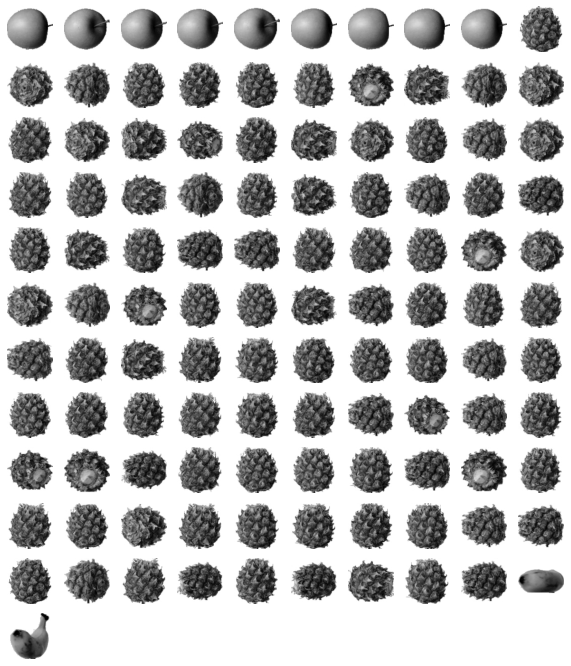

In [61]:
draw_fruits(fruits[km.labels_==0])

레이블 0으로 클러스터링된 91개의 이미지를 모두 출력했다. 이 클러스터는 모두 사과가 올바르게 모였다. 그럼 다른 두 클러스도 출력해 보자.

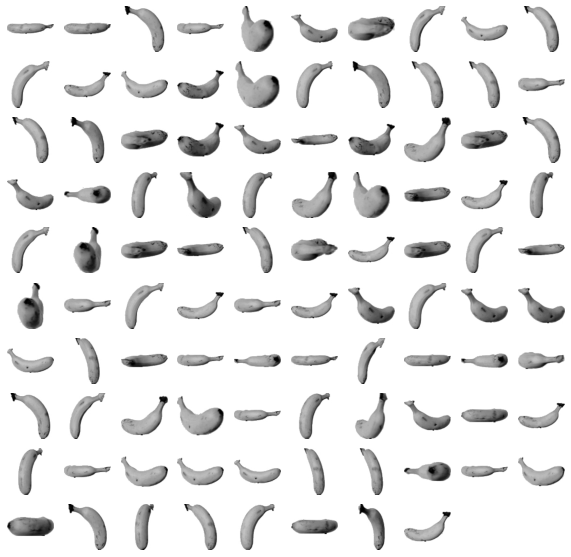

In [62]:
draw_fruits(fruits[km.labels_==1])

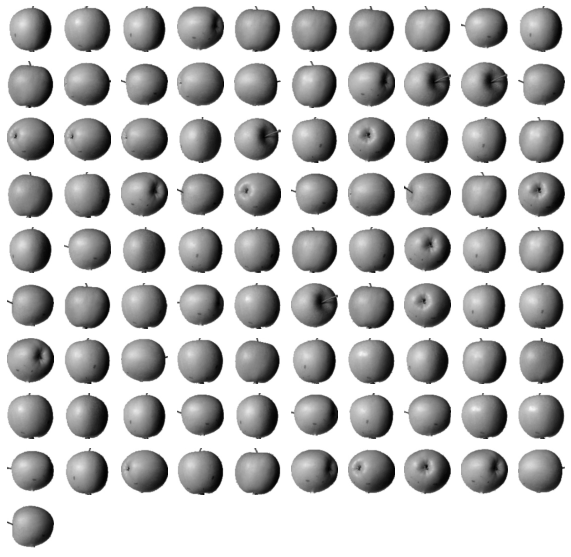

In [64]:
draw_fruits(fruits[km.labels_==2])


레이블이 1인 클러스터는 바나나로만 이루어져 있다. 하지만 레이블이 2인 클러스터는 파인애플에 사과 9개와 바나나 2개가 섞여 있다. k-평균 알고리즘이 이 샘플들을 완벽하게 구별해내지는 못했다. 하지만 훈련 데이터에 타깃 레이블을 전혀 제공하지 않았음에도 스스로 비슷한 샘플들을 아주 잘 모은 것 같다.

### 클러스터 중심

KMeans 클래스가 최종적으로 찾은 클러스터 중심은 cluster_centers_ 속성에 저장되어 있다. 이 배열은 fruits_2d 샘플의 클러스터 중심이기 때문에 이미지로 출력하려면 100 x 100 크기의 2차원 배열로 바꿔야 한다.

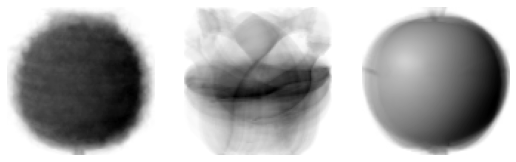

In [66]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

이전 절에서 사과, 바나나, 파인애플의 픽셀 평균값을 출력했던 것과 매우 비슷하다.

KMeans 클래스는 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환해 주는 transform() 메서드를 가지고 있다. transform() 메서드가 있다는 것은 마치 StandardScaler 클래스 처럼 특성값을 변환하는 도구로 사용할 수 있다는 점이다.

인덱스가 100인 샘플에 transform() 메서드를 적용해 보자. fit() 메서드와 마찬가지로 2차원 배열을 기대한다. fruits_2d[100]처럼 쓰면 (10000,) 크기의 배열이 되므로 에러가 발생한다. 슬라이싱 연산자를 사용해서 (1,10000) 크기의 배열을 전달하자.

In [67]:
print(km.transform(fruits_2d[100:101]))

[[3393.8136117  8837.37750892 5267.70439881]]


하나의 샘플을 전달했기 때문에 반환된 배열은 크기가 (1, 클러스터 개수)인 2차원 배열이다. 첫 번째 클러스터(레이블0), 두번째 클러스터(레이블1)가 각각 첫 번째 원소, 두 번째 원소의 값이다. 세 번째 클러스터까지의 거리가 3393.8로 가장 작다. 이 샘플은 레이블 2에 속한 것 같다. KMeans 클래스는 가장 가까운 클러스터 중심을 예측 클래스로 출력하는 predict() 메서드를 제공한다.

In [68]:
print(km.predict(fruits_2d[100:101]))

[0]


transform()의 결과에서 짐작할 수 있듯이 레이블 2로 예측 했다. 클러스터 중심을 그려보았을때 레이블 2는 파인애플이었으므로 이 샘플은 파인애플이다. 확인해 보자.

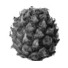

In [69]:
draw_fruits(fruits[100:101])

k-평균 알고리즘은 앞에서 설명했듯이 반복적으로 클러스터 중심을 옮기면서 최적의 클러스터를 찾는다. 알고리즘이 반복한 횟수는 KMeans 클래스의 n_iter_속성에 저장된다.

In [70]:
print(km.n_iter_)

4


좋다. 클러스터 주심을 특성 공학처럼 사용해 데이터셋을 저차원(이 경우에는 10,000에서 3으로 줄인다)으로 변환할 수 있다. 또는 가장 가까운 거리에 있는 클러스터 중심을 샘플의 예측값으로 사용할 수 있다는 것을 배웠다.

이번에 우리는 타깃값을 사용하지 않았지만, 약간의 편법을 사용했다. n_clusters를 3으로 지정한 것은 타깃에 대한 정볼르 활용한 셈이다. 실전에서는 클러스터 개수조차 알 수 없다. 그렇다면 n_clusters를 어떻게 지정해야 할까요? 최적의 클러스터 개수는 얼마일까요? 이어서 알아보자.


### 최적의 k 찾기

k-평균 알고맂ㅁ의 단점 중 하나는 클러스터 개수를 사전에 지정해야 한다는 것이다. 실전에서는 몇 개의 클러스터가 있는지 알 수 없다. 어떻게 하면 적절한 k값을 찾을 수 있는지 알아 보자.


사실 군집 알고리즘에서 적절한 k값을 찾기 위한 완벽한 방법은 없다. 몇 가지 도구가 있지만 저마다 장단점이 있다. 여기서는 적절한 클러스터 개수르 찾기 위한 대표적인 방법인 **엘보우elbow** 방법에 대해 알아보자.

앞에서 본 것처럼 k-평균 알고리즘은 클러스터 중심과 클러스터에 속한 샘플 사이의 거리를 잴 수 있다. 이 거리의 제곱 합을 **이너셔inertia**라고 부른다. 이너셔는 클러스터에 속한 샘플이 얼마나 가깝게 모여 있는지를 나타내는 값으로 생각할 수 있다. 일반적으로 클러스터 개수가 늘어나면 클러스터 개개의 크기는 줄어들기 때문에 이너셔도 줄어든다. 엘보우 방법은 클러스터 개수를 늘려가면서 이너셔의 변화를 관찰하여 최적의 클러스터 개수를 찾는 방법이다.

클러스터 개수를 증사시키면서 이너셔를 그래프로 그리면 감소하는 속도가 꺽이는 지점이 있다. 이 지점부터는 클러스터 개수를 늘려도 클러스터에 잘 밀집된 정도가 크게 개선되지 않는다.

즉 이너셔가 크게 줄어들지 않는다. 이 지점이 마치 팔꿈치 모양이어서 엘보우 방법이라 부른다. 과일 데이터셋을 사용해 이너셔를 계산해 보자. 친절하게도 KMeans 클래스는 자동으로 이너셔를 계산해서 inertia_ 속성으로 제공한다. 다음 코드에서 클러스터 개수 k를 2~ 6까지 바꿔가며 KMeans 클래스를 5번 훈련한다. fit() 메서드로 모델을 훈련한 후 inertia_ 속성에 저장된 이너셔값을 inertia 리스트에 추가한다. 마지막으로 inertia 리스트에 저장된 값을 그래프로 출력한다.

In [72]:
inertia = []
for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
    
plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

이 그래프에서 꺽이는 지점이 뚜렷하지는 않지만, k=3에서 그래프의 기울기가 조금 바뀐 것을 볼 수 있다. 엘보우 지점보다 클러스터 개수가 많아지면 이너셔의 변화가 줄어들면서 군집 효과도 줄어든다. 하지만 이 그래프에서는 이런 지점이 명확하지는 않다.

### 과일을 자동으로 분류하기 - 문제해결

1절에서는 과일 종류별로 픽셀 평균값을 계산했다. 하지만 실저네서는 어떤 과일 사진이 들어올지 모른다. 따라서 타깃값을 모르는 척하고 자동으로 사진을 클러스터로 모을 수 있는 군집 알고리즘이 필요하다.

이 절에서는 대표적인 군집 알고리즘인 k-평균 알고리즘을 사용했다. k-평균은 비교적 간단하고 속도가 빠르며 이해하기도 쉽다. k-평균은 비교적 간단하고 속도가 빠르며 이해하기 쉽다. k-평균 알고리즘을 구현한 사이킷런 KMeans 클래스는 각 샘플이 어떤 클러스터에 소속되어 있는지 labels_속성에 저장한다.

각 샘플에서 각 클러스터까지의 거리를 하나의 특성으로 활용할 수 있다. 이를 위해 KMeans 클래스는 transform() 메서드를 제공한다. 또한 predict() 메서드에서 새로운 샘플에 대해 가장 가까운 클러스터를 예측값으로 출력한다.

k-평균 알고리즘은 사전에 클러스터 개수를 미리 지정해야 한다. 사실 데이터를 직접 확인하지 않고서는 몇개의 클러스터가 만들어질지 알기 어렵다. 최적의 클러스터 개수 k를 알아내는 한 가지 방법은 클러스터가 얼마나 밀집되어 있는지 나타내는 이너셔를 사용하는 것이다. 이너셔가 더 이상 크게 줄어들지 않는다면 클러스터 개수를 더 늘리는 것은 효과가 없다. 이를 엘보우 방법이라고 부른다.

사이킷런의 KMeans 클래스는 자동으로 이너셔를 계산하여 inertial_ 속성으로 제공한다. 클러스터 개수를 늘리면서 반복하여 KMeans 알고리즘을 훈련하고 이너셔가 줄어드는 속도가 꺽이는 지점을 최적의 클러스터 개수로 결정한다.


이번 절에서 k-평균 알고리즘의 클러스터 중심까지 거리를 특성으로 사용할 수도 있다는 점을 보았다. 이렇게 하면 훈련 데이터의 차원을 크게 줄일 수 있다. 데이터셋의 차원을 줄이면 지도 학습 알고리즘의 속도를 크게 높일 수 있다. 다음 절에서는 비지도 학습의 또 다른 종류인 차원 축소에 대해서 본격적으로 알아보겠다.

> 전체 소스 코드

- https://bit.ly/hg-06-2 에 접속하면 코랩에서 이 절의 코드를 바로 열어 볼 수 있다.

k-평균

KMeans 클래스



In [73]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2021-05-29 10:58:13--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-05-29 10:58:13--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 52.78.231.108
Connecting to github.com (github.com)|52.78.231.108|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-05-29 10:58:14--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... con

In [74]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [75]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [76]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [77]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


In [78]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

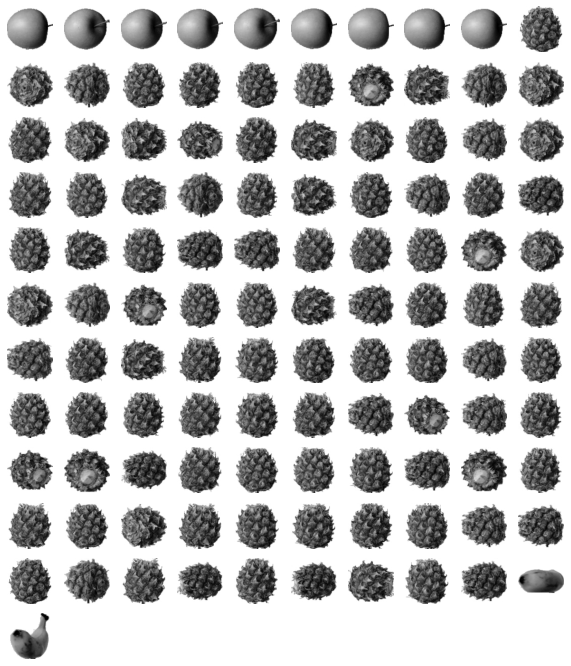

In [79]:
draw_fruits(fruits[km.labels_==0])

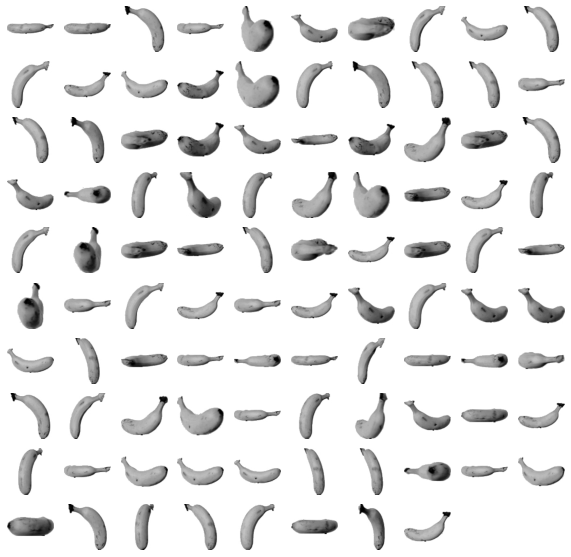

In [80]:
draw_fruits(fruits[km.labels_==1])

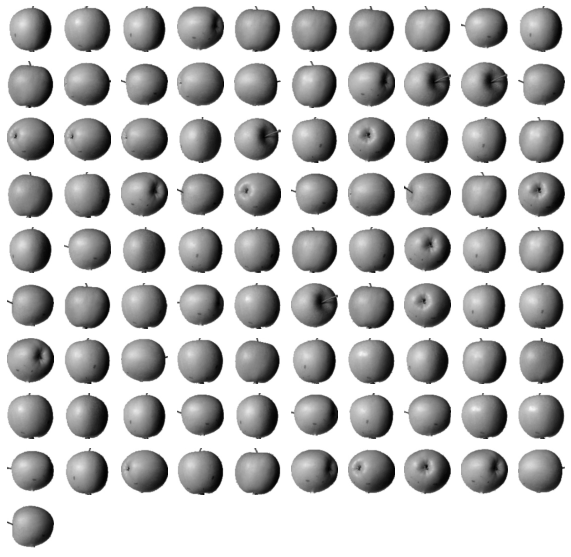

In [81]:
draw_fruits(fruits[km.labels_==2])

클러스터 중심

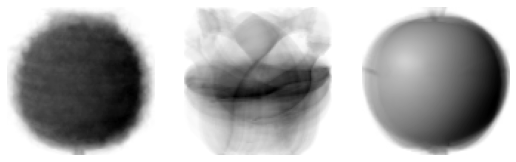

In [82]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [83]:
print(km.transform(fruits_2d[100:101]))

[[3393.8136117  8837.37750892 5267.70439881]]


In [84]:
print(km.predict(fruits_2d[100:101]))

[0]


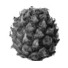

In [85]:
draw_fruits(fruits[100:101])

In [86]:
print(km.n_iter_)

4


최적의 k 찾기

In [87]:
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

## 06-3 주성분 분석

- 핵심키워드
    - 차원 축소
    - 주성분 분석
    - 설명된 분산
    - 차원 축소에 대해 이해하고 대표적인 차원 축소 알고리즘 중 하나인 PCA(주성분 분석) 모델을 만들어 보자.
    
    
### 차원과 차원 축소

지금까지 우리는 데이터가 가진 속성을 특성이라 불렀다. 과일 사진의 경우 10,000개의 픽셀이 있기 때문에 10,000 개의 특성이 있는 셈이다. 머신러닝에서는 이런 특성을 **차원dimension** 이라고도 부른다. 10,000개의 특성은 결국 10,000개의 차원이라는 건데 이 차원을 줄일 수 있다면 저장 공간을 크게 절약할 수 있을 것이다.

- 2차원 배열과 1차원 배열의 차원은 다른 건가?
    - 2차원 배열과 1차원 배열(벡터)에서 차원이란 용어는 조금 다르게 사용한다. 다차원 배열에서 차원은 배열의 축 개수가 된다. 가령 2차원 배열일 때는 행과 열이 차원이 된다. 하지만 1차원 배열, 즉 벡터일 경우에는 원소의 개수를 말한다. 이 절에서는 혼돈을 피하고자 가능하면 차원 대신 특성을 사용한다. 하지만 차원이랑 단어를 완전히 배제하기는 어렵다. 이 책이나 다른 책을 볼 때 참고하자.


이를 위해 비지도 학습 작업 중 하나인 **차원 축소 dimensionality reduction** 알고리즘을 다루어 보겠다. 3장에서 특성이 많으면 선형 모델의 성능이 높아지고 훈련 데이터에 쉽게 과대적합된다는 것을 배웠다. 차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법이다.

또한 줄어든 차원에서 다시 원본 차원(예를 들어 과일 사진의 경우 10,000개의 차원)으로 손실을 최대한 줄이면서 복원할 수도 있다. 이 절에서는 대표적인 차원 축소 알고리즘인 **주성분 분석 principal component analysis** 을 배우겠다. 주성분 분석을 간단히 **PCA** 라고도 부른다.

### 주성분 분석 소개

주성분 분석 PCA 은 데이터에 있는 분산이 큰 방향을 찾는 것으로 이해 할 수 있다. 주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어든다는 점을 기억하자.

### PCA 클래스

이전 절과 마찬가리조 과일 사진 데이터를 다운로드하여 넘파이 배열로 적재하겠다.

In [88]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
    
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d=fruits.reshape(-1, 100*100)

--2021-05-29 11:15:59--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-05-29 11:16:00--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 52.78.231.108
Connecting to github.com (github.com)|52.78.231.108|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-05-29 11:16:00--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... con

사이킷런은 sklearn.decomposition 모듈 아래 PCA 클래스로 주성분 분석 알고리즘을 제공한다. PCA 클래스의 객체를 만들 때 n_components 매개변수에 주성분의 개수를 지정해야 한다. k-평균과 마찬가지로 비지도 학습이기 때문에 fit() 메서드에 타깃값을 제공하지 않는다.

In [90]:
from sklearn.decomposition import PCA
pca= PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

간단하다. PCA 클래스가 찾은 주성분은 components_ 속성에 저장되어 있다. 이 배열의 크기를 확인하겠다.

In [91]:
print(pca.components_.shape)

(50, 10000)


n_components=50 으로 지정했기 때문에 pca.components_배열의 첫 번째 차원이 50이다. 즉 50개의 주성분으 찾는 거다. 두 번째 차원은 항상 원본 데이터의 특성 개수와 같은 10,000이다.

원본 데이터와 차원이 같으므로 주성분을 100 x 100 크기의 이미지처럼 출력해 볼 수 있다. 2절에서 사용했던 draw_fruits() 함수를 사용해서 이 주성분을 그림으로 그려보자. 이 함수의 실제 코드는 2절을 참고하자.

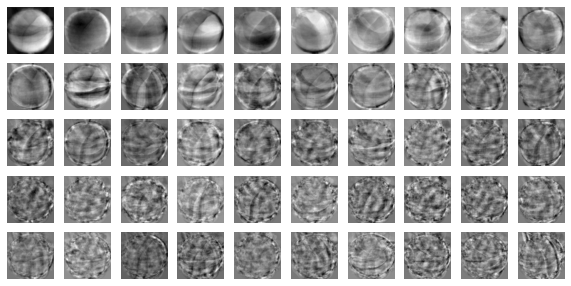

In [92]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것이다. 한편으로는 데이터셋에 있는 어떤 특징을 잡아낸 것처럼 생각할 수도 있다.

주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있다. 이는 마치 원본 데이터를 각 주성분으로 분해하는 것으로 생각할 수 있다. PCA의 transform() 메서드를 사용해 원본 데이터의 차원을 50으로 줄여 보자.

In [93]:
print(fruits_2d.shape)

(300, 10000)


In [94]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


fruits_2d 는 (300, 10000)의 크기의 배열이었다. 10,000개의 픽셀(특성)을 가진 300개의 이미지이다. 50개의 주성분을 찾은 PCA모델을 사용해 이를 (300,50) 크기의 배열로 변환했다. 이제 fruits_pca 배열은 50개의 특성을 가진 데이터이다.

데이터를 성공적으로 줄였다. 무려 1/200로 줄어들었다. fruits_2d 대신 fruits_pca를 저장한다면 훨씬 공간을 줄일 수 있다. 데이터의 차원을 줄였다면 다시 원상 복구할 수도 있을까?


### 원본 데이터 재구성

앞에서 10,000개의 특성을 50개로 줄였다. 이로 인해 어느 정도 손실이 발생할 수밖에 없다. 하지만 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성할 수 있다.

PCA 클래스는 이를 위해 inverse_transform() 메서드를 제공한다. 앞서 50개의 차원으로 축소한 fruits_pca 데이터를 전달해 10,000개의 특성을 복원하겠다.

In [95]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


예상대로 10,000개의 특성이 복원 되었다. 이 데이터를 100 x 100 크기로 바꾸어 100개씩 나누어 출력하겠다. 이 데이터는 순서대로 사과, 파인애플, 바나나를 100개씩 담고 있다.

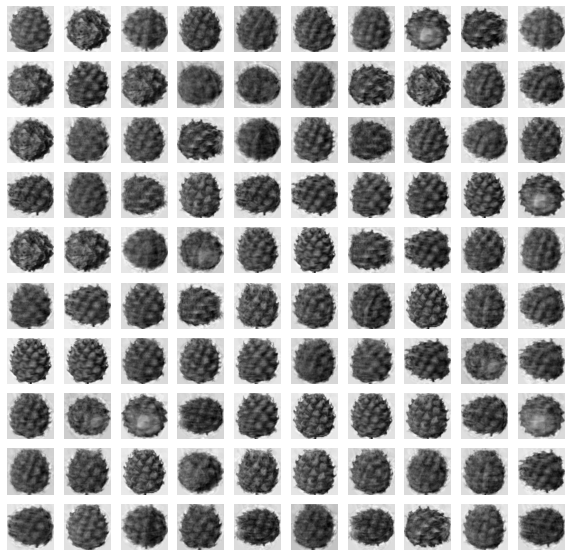

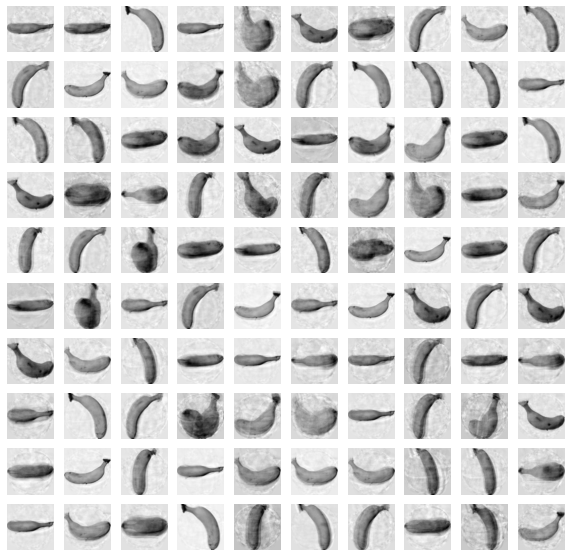

In [96]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

와우! 거의 모든 과일이 잘 복원 되었다. 일부 흐리고 번진 부분이 있지만 불과 50개의 특성을 10,000개로 늘린 것을 감안한다면 놀라운 일이다. 이 40개의 특성이 분산을 가장 잘 보존하도록 변환된 것이기 때문이다.

만약 주성분을 최대로 사용했다면 완벽하게 원본 데이터를 재구성할 수 있을 것이다. 그럼 50개의 특성을 얼마나 분산을 보존하고 있는 것일까?
다음을 통해 알아보자.


### 설명된 분산

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 **설명된 분산 explained variance** 이라고 한다. PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있다. 당연히 첫 번째 주성분의 설명된 분산이 가장 크다. 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있다.

- 설명된 분산은 주성분이 원본데이터의 분산을 얼마나 잘 나타내는지 기록한 값이다.



In [97]:
print(np.sum(pca.explained_variance_ratio_))

0.9215574271239145


92%가 넘는 분산을 유지하고 있다. 앞에서 50개의 특성에서 원본 데이터를 복원했을 때 원본 이미지의 품질이 높았던 이유를 여기에서 찾을 수 있다. 설명된 분산의 비율을 그래프로 그려 보면 적절한 주성분의 개수를 찾는데 도움이 된다. 맷플롯립의 plot() 함수로 설명된 분산을 그래프로 출력해 보자.

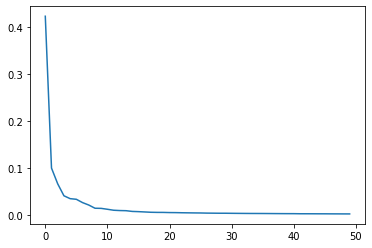

In [99]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

그래프를 보면 처음 10개의 주성분이 대부분의 분산을 표현하고 있다. 그 다음부터는 각 주성분이 설명하고 있는 분산은 비교적 작다. 이번에는 PCA로 차원 축소된 데이터를 사용하여 지도 학습 모델을 훈련하겠다. 원본 데이터를 사용했을 때와 어떤 차이가 있는지 확인해 보자.

### 다른 알고리즘과 함께 사용하기

과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해 보고 어떤 차이가 있는지 알아보자. 3개의 과일 사진을 분류해야 하므로 간단히 로지스틱 회귀 모델을 사용하겠다. 저 사이킷런의 LogisticRegression 모델을 만든다.

In [100]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

지도 학습 모델을 사용하려면 타깃값이 있어야 한다. 여기에서는 사과를 0, 파인애플을 1, 바나나를 2로 지정했다. 파이썬 리스트와 정수를 곱하면 리스트 안의 원소를 정수만큼 반복한다. 이를 이용하면 100개의 0, 100개의 1, 100개의 2로 이루어진 타깃 데이터를 손쉽게 만들 수 있다.

In [101]:
target = np.array([0]*100 + [1]*100 + [2]*100)

먼저 원본 데이터인 fruits_2d를 사용해 보자. 로지스틱 회귀 모델에서 성능을 가늠해 보기 위해 cross_validate()로 교차 검증을 수행한다.

In [103]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.9130433082580567


교차 검증의 점수는 0.997 정도로 매우 높다. 특성이 10,000개나 되기 때문에 300개의 샘플에서는 금방 과대적합된 모델을 만들기 쉽다. cross_validate() 함수가 반환하는 딕셔너리에는 fit_time 항목에 각 교차 검증 폴드의 훈련 시간이 기록되어 있다. 0.94초 정도 걸렸다. 이 값을 PCA로 축소한 fruits_pca를 사용했을 때와 비교하겠다.

In [104]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.03347268104553223


50개의 특성만 사용했는데도 정확도가 100$이고 훈련 시간은 0.03초로 20배이상 감소했다. PCA로 훈련 데이터의 차원을 축소하면 저장 공간 뿐만아니라 머신러닝 모델의 훈련 속도도 높일 수 있다.

앞서 PCA 클래스를 사용할 때 n_components 매개변수에 주성분의 개수를 지정했다. 이 대신 원하는 설명된 분산의 비율을 입력할 수도 있다. PCA 클래스는 지정된 비율에 도달할 때까지 자동으로 주성분을 찾는다. 설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 모델을 만들어 보자.

In [105]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

간단하다. 주성분 개수 대신 0 ~ 1 사이의 비율을 실수로 입력하면 된다. 몇 개의 주선분을 찾았는지 확인해 보자.

In [106]:
print(pca.n_components_)

2


단 2개다. 2개의 특서만으로 원본 데이터에 있는 분산의 50%를 표현할 수 있다.

이 모델로 원본 데이터를 변환하겠다. 주성분이 2개이므로 변환된 데이터의 크기는 (300,2)가 될 것이다.

In [107]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


2개의 특성만 사용하고도 교차 검증의 결과가 좋을까? 한번 확인해보자

In [108]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

0.9933333333333334
0.05203094482421875


/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


와! 정말 놀랍다. 2개의 특성을 사용했을 뿐인데 정확도가 99%의 정확도를 달성했다.

이번에는 차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터를 찾아보겠다.

In [109]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


fruits_pca 로 찾은 클러스터는 각각 91개 , 99개, 110개의 샘플을 포함하고 있다. 이는 2절에서 원본 데이터를 사용해을 때와 거의 비슷한 결과이다. KMeans가 찾은 레이블을 사용해 과일 이미지를 출력해 보자.

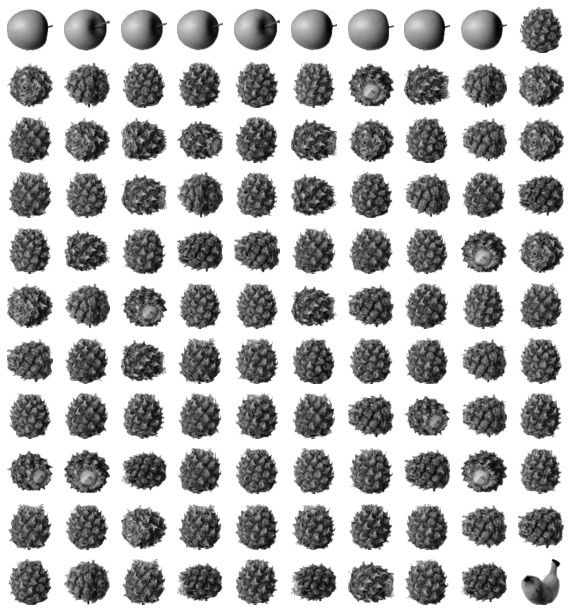

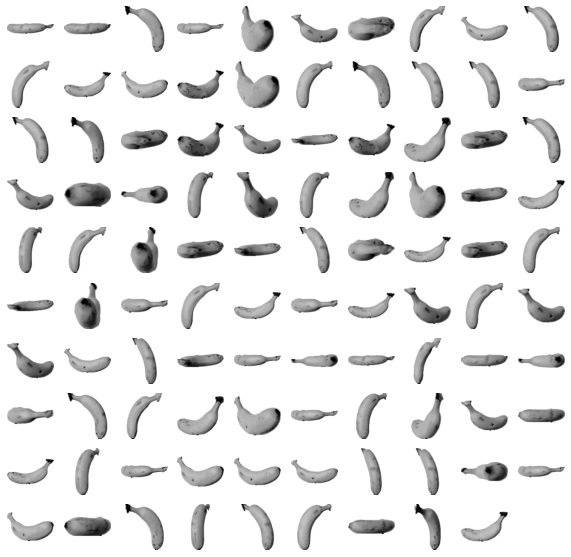

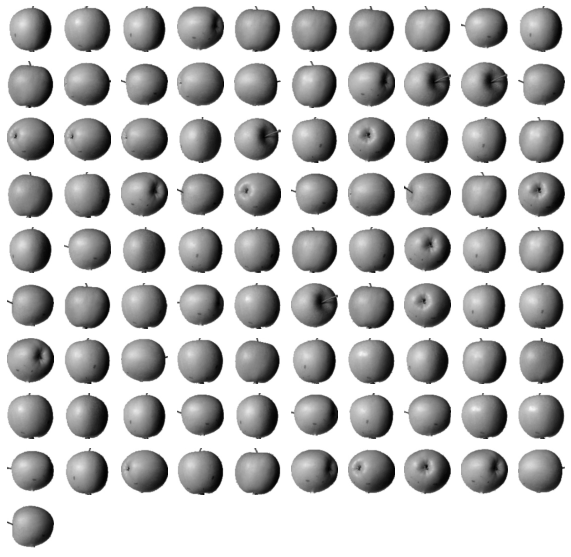

In [110]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

2절에서 찾은 클러스터와 비슷하게 파인애플은 사과와 조금 혼돈되는 면이 있다. 몇 개의 사과가 파인애플 클러스터에 섞여 들어가 있다.

훈련 데이터의 차원을 줄이면 또 하나 얻을 수 있는 장점은 시각화이다. 3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉽다. fruits_pca 데이터는 2개의 특성이 있기 때문에 2차원으로 표현 할 수 있다. 앞에서 찾은 km.labels_를 사용해 클러스터별로 나누어 산점도를 그려보자.

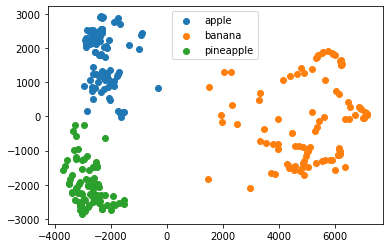

In [111]:
for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
    
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

각 클러스터의 산점도가 아주 잘 구분된다. 2개의 특성만을 사용했는데 로지스틱 회귀 모델의 교차 검증 점수가 99%에 달하는 이유를 이제 알 것 같다.

이 그림을 보면 사과와 파인애플 클러스터의 경계가 가깝게 붙어 있다. 이 두 클러스터의 샘플은 몇 개가 혼동을 일으키기 쉬울 것 같다. 데이터를 시각화하면 예상치 못한 통찰을 얻을 수 있다. 그런 면에서 차원 축소는 매우 유용한 도구 중 하나이다.


### 주성분 분석으로 차원 축소 - 문제해결 과정


이 절에서는 대표적인 비지도 학습 문제 중 하나인 차원 축소에 대해 알아본다. 차원 축소를 사용하면 데이터셋의 크기를 줄일 수 있고 비교적 시각화 하기 쉽다. 또 차원 축소된 데이터를 지도 학습 알고리즘이나 다른 비지도 학습 알고리즘에 재사용하여 성능을 높이거나 훈련 속도를 빠르게 만들 수 있다.

사이킷런의 PCA 클래스를 사용해 과일 사진 데이터의 특성을 50개로 크게 줄었다. 특성 개수는 작지만 변환된 데이터는 원본 데이터에 있는 분산이 90% 이상을 표현한다. 이를 설명된 분산이라 부른다.

PCA 클래스는 자동으로 설명된 분산을 계산하여 제공해 준다. 또한 주성분의 개수를 명시적으로 지정하는 대신 설명된 분산의 비율을 설정하여 원하는 비율만큼 주성분을 찾을 수 있다.

PCA 클래스는 변환된 데이터에서 원본 데이터를 복원하는 메서드도 제공한다. 변환된 데이터가 원본 데이터의 분산을 모두 유지하고 있지 않다면 완벽하게 복원되지 않는다. 하지만 적은 특성으로 상당 부분의 디테일을 복원 할 수 있다.


지금까지 머신러닝의 주요 알고리즘을 살펴 보았다. 다음 장에서는 최근 머신러닝 분야에서 가장 인기 있는 주제인 딥러닝에 대해 배워보겠다.

> 전체 소스 코드


- https://bit.ly//hg-6-3 에 접속하면 코랩에서 이절의 코드를 바로 열어 볼 수 있다.

- 출처: 혼자 공부하는 머신러닝 + 딥러닝